In [ ]:
# Install Library
!pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00


# **PENGAMBILAN DATA**

In [ ]:
from google_play_scraper import reviews, Sort
import pandas as pd

# List buat nampung data ulasan
all_reviews = []

# Looping buat ambil data banyak (5000 Ulasan)
for i in range(0, 5000, 1000):
    result, _ = reviews(
        'com.shopee.id',  # ID Shopee
        lang='id',        # Bahasa Indonesia
        country='id',     # Indonesia
        sort=Sort.NEWEST, # Ulasan Terbaru
        count=3000,       # Ambil 3000 Ulasan
        continuation_token=None
    )
    all_reviews.extend(result)

# Konversi ke DataFrame
df = pd.DataFrame(all_reviews)[['content', 'at']]
df.columns = ['Ulasan', 'Tanggal']

# Filter Data dari Tahun 2023 - 2025
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df[(df['Tanggal'] >= '2023-01-01') & (df['Tanggal'] <= '2025-03-03')]

# Reset Index
df = df.reset_index(drop=True)

# Simpan ke CSV
df.to_csv("ulasan_shopee_3000.csv", index=False)
print("Data Berhasil Disimpan!")

# Download CSV Otomatis
from google.colab import files
files.download("ulasan_shopee_3000.csv")


Data Berhasil Disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

# Baca Data CSV
file_path = 'Dataset/ulasan_shopee_3000.csv'
data = pd.read_csv(file_path)

display(data)

,Ulasan,Tanggal
0,Saya suka & kwalitas terbaik,2025-03-02 02:26:52
1,Ok,2025-03-02 02:26:11
2,Bagus ada cod cek dulu kalo salah bisa balikin,2025-03-02 02:26:07
3,Tidak mendapatkan semua layanan shopee buruk,2025-03-02 02:23:40
4,sangat memuaskan tiap belanja di shopee,2025-03-02 02:21:40
...,...,...
14995,Hai kak maaf ya ngasih bintang cuman 2 soalya ...,2025-02-28 01:11:17
14996,Bagus sekali aplikasi nya,2025-02-28 01:10:40
14997,"Apa apaan aplikasi bobrok Udah cekout, pesanan...",2025-02-28 01:10:03
14998,Pengiriman yang baik ramah dan sopan barang ny...,2025-02-28 01:07:56


# **MULTI ASPEK**

In [4]:
import pandas as pd
import re

# Load Data
df = pd.read_csv("Dataset/ulasan_shopee_3000.csv")

# List Kata Kunci Aspek
aspek_harga = ['murah', 'mahal', 'ongkir', 'diskon', 'promo', 'cashback']
aspek_pelayanan = ['cs', 'customer service', 'komplain', 'balasan', 'pengaduan', 'pelayanan']
aspek_aplikasi = ['error', 'lemot', 'fitur', 'update', 'login', 'sistem', 'bug']

# Function Klasifikasi Multi-Aspek
def aspek_klasifikasi(ulasan):
    ulasan = ulasan.lower()  # Ubah jadi huruf kecil semua
    aspek_list = []

    if any(re.search(r'\b' + word + r'\b', ulasan) for word in aspek_harga):
        aspek_list.append('Harga')
    if any(re.search(r'\b' + word + r'\b', ulasan) for word in aspek_pelayanan):
        aspek_list.append('Pelayanan')
    if any(re.search(r'\b' + word + r'\b', ulasan) for word in aspek_aplikasi):
        aspek_list.append('Aplikasi')

    return ', '.join(aspek_list) if aspek_list else None  # Jika kosong, return None

# Tambahin Kolom Aspek
df['Aspek'] = df['Ulasan'].apply(aspek_klasifikasi)

# Hapus Baris yang Tidak Memiliki Aspek
df = df.dropna(subset=['Aspek'])

# Simpan ke Excel dalam satu sheet saja
df.to_excel("ulasan_shopee_multi_aspek.xlsx", index=False)

print("Data Berhasil Disimpan")




Data Berhasil Disimpan


In [5]:
import pandas as pd

# Baca Data CSV
file_path = 'Dataset/ulasan_shopee_multi_aspek.xlsx'
data = pd.read_excel(file_path)

display(data)

,Ulasan,Tanggal,Aspek
0,"Sudah berlangganan shopee sejak lama, akun pun...",2025-03-02 02:12:19,Pelayanan
1,Suka pake shopee mpe setiap hari mesti checkou...,2025-03-02 01:56:17,Pelayanan
2,Banyak promo nyaaa,2025-03-02 01:48:33,Harga
3,Bagus bgt apalagi untuk pengguna baru diskon n...,2025-03-02 01:47:26,Harga
4,"Pakai shopee aman-aman aja, cuman beberapa har...",2025-03-02 01:39:17,Pelayanan
...,...,...,...
2330,aku kasih bintang 5 karna selalu gratis ongkir...,2025-02-28 01:22:00,Harga
2331,Setelah beberapa x berbelanja di shopee saya m...,2025-02-28 01:21:05,Pelayanan
2332,Cool tapi keseringan update,2025-02-28 01:18:19,Aplikasi
2333,"Puass bgtt belanja dishoope serba adaaa euyy,j...",2025-02-28 01:11:53,Aplikasi


# **ANALISIS SENTIMEN**

In [6]:
import pandas as pd
import re

# Load Data
df = pd.read_excel("Dataset/ulasan_shopee_multi_aspek.xlsx")

# Daftar Kata Positif dan Negatif
kata_positif = ['bagus', 'puas', 'mantap', 'baik', 'cepat', 'murah', 'ramah', 'oke', 'senang']
kata_negatif = ['buruk', 'lambat', 'jelek', 'tidak puas', 'parah', 'mahal', 'kecewa', 'lemot', 'error']

# Function Analisis Sentimen
def analisis_sentimen(ulasan):
    ulasan = str(ulasan).lower()
    skor = 0

    for kata in kata_positif:
        if kata in ulasan:
            skor += 1
    for kata in kata_negatif:
        if kata in ulasan:
            skor -= 1

    if skor > 0:
        return 'Positif'
    elif skor < 0:
        return 'Negatif'
    else:
        return 'Netral'

# Tambahkan Kolom Sentimen
df['Sentimen'] = df['Ulasan'].apply(analisis_sentimen)

# Simpan ke Excel
df.to_excel("ulasan_shopee_sentimen.xlsx", index=False)

print("Data Berhasil Disimpan dengan Analisis Sentimen")


Data Berhasil Disimpan dengan Analisis Sentimen


In [8]:
import pandas as pd

# Baca Data CSV
file_path = 'Dataset/ulasan_shopee_sentimen.xlsx'
data = pd.read_excel(file_path)

display(data)

,Ulasan,Tanggal,Aspek,Sentimen
0,"Sudah berlangganan shopee sejak lama, akun pun...",2025-03-02 02:12:19,Pelayanan,Positif
1,Suka pake shopee mpe setiap hari mesti checkou...,2025-03-02 01:56:17,Pelayanan,Netral
2,Banyak promo nyaaa,2025-03-02 01:48:33,Harga,Netral
3,Bagus bgt apalagi untuk pengguna baru diskon n...,2025-03-02 01:47:26,Harga,Positif
4,"Pakai shopee aman-aman aja, cuman beberapa har...",2025-03-02 01:39:17,Pelayanan,Netral
...,...,...,...,...
2330,aku kasih bintang 5 karna selalu gratis ongkir...,2025-02-28 01:22:00,Harga,Netral
2331,Setelah beberapa x berbelanja di shopee saya m...,2025-02-28 01:21:05,Pelayanan,Positif
2332,Cool tapi keseringan update,2025-02-28 01:18:19,Aplikasi,Netral
2333,"Puass bgtt belanja dishoope serba adaaa euyy,j...",2025-02-28 01:11:53,Aplikasi,Positif


# **DATA UNDERSTANDING**

In [9]:
# Memuat dataset
file_path = 'Dataset/ulasan_shopee_sentimen.xlsx'
data = pd.read_excel(file_path)

# Melihat banyak baris dan kolom dalam dataset
data.shape

(2335, 4)

In [ ]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ulasan    2335 non-null   object
 1   Tanggal   2335 non-null   object
 2   Aspek     2335 non-null   object
 3   Sentimen  2335 non-null   object
dtypes: object(4)
memory usage: 73.1+ KB


In [ ]:
data.columns

Index(['Ulasan', 'Tanggal', 'Aspek', 'Sentimen'], dtype='object')

In [10]:
!pip install emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------------------------- ---- 524.3/590.6 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl (274 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\nltk.exe' -> 'C:\\Python310\\Scripts\\nltk.exe.deleteme'


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **DATA PREPOCESSING**

In [ ]:
import pandas as pd
import re
import string
import emoji

# Load Data
df = pd.read_excel("Dataset/ulasan_shopee_sentimen.xlsx")

# Hapus duplikat
df = df.drop_duplicates()

# Hapus data kosong
df = df.dropna(subset=['Ulasan'])

# Fungsi untuk membersihkan teks (termasuk hapus emoji, karakter khusus, dan tanda diakritik)
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'http\S+', '', text)  # Hapus link
    text = re.sub(r'@\w+|\#', '', text)  # Hapus mention dan hashtag
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = emoji.replace_emoji(text, replace='')  # Hapus emoji
    text = re.sub(r'[ᗒᗣᗕ՞]', '', text)  # Hapus karakter khusus
    text = re.sub(r'[⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼²³⁴⁵⁶⁷⁸⁹]', '', text)  # Hapus tanda superscript/subscript
    text = text.strip()  # Hapus spasi berlebih
    return text

# Bersihkan teks ulasan
df['Ulasan_Clean'] = df['Ulasan'].apply(clean_text)

# Simpan hasil preprocessing ke file baru
df.to_excel("ulasan_shopee_preprocessed.xlsx", index=False)
print("Preprocessing selesai! Data disimpan sebagai 'ulasan_shopee_preprocessed.xlsx'")


Preprocessing selesai! Data disimpan sebagai 'ulasan_shopee_preprocessed.xlsx'


In [16]:
import pandas as pd

# Baca Data CSV
file_path = 'Dataset/ulasan_shopee_preprocessed.xlsx'
data = pd.read_excel(file_path)

display(data)

,Ulasan,Tanggal,Aspek,Sentimen,Ulasan_Clean
0,"Sudah berlangganan shopee sejak lama, akun pun...",2025-03-02 02:12:19,Pelayanan,Positif,sudah berlangganan shopee sejak lama akun pun ...
1,Suka pake shopee mpe setiap hari mesti checkou...,2025-03-02 01:56:17,Pelayanan,Netral,suka pake shopee mpe setiap hari mesti checkou...
2,Banyak promo nyaaa,2025-03-02 01:48:33,Harga,Netral,banyak promo nyaaa
3,Bagus bgt apalagi untuk pengguna baru diskon n...,2025-03-02 01:47:26,Harga,Positif,bagus bgt apalagi untuk pengguna baru diskon n...
4,"Pakai shopee aman-aman aja, cuman beberapa har...",2025-03-02 01:39:17,Pelayanan,Netral,pakai shopee amanaman aja cuman beberapa hari ...
...,...,...,...,...,...
462,aku kasih bintang 5 karna selalu gratis ongkir...,2025-02-28 01:22:00,Harga,Netral,aku kasih bintang 5 karna selalu gratis ongkir...
463,Setelah beberapa x berbelanja di shopee saya m...,2025-02-28 01:21:05,Pelayanan,Positif,setelah beberapa x berbelanja di shopee saya m...
464,Cool tapi keseringan update,2025-02-28 01:18:19,Aplikasi,Netral,cool tapi keseringan update
465,"Puass bgtt belanja dishoope serba adaaa euyy,j...",2025-02-28 01:11:53,Aplikasi,Positif,puass bgtt belanja dishoope serba adaaa euyyjn...


# **VISUALISASI**

Visualisasi Distribusi Sentimen Secara Keseluruhan

C:\Users\afiii\AppData\Local\Temp\ipykernel_5680\638154901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentimen", palette="pastel")


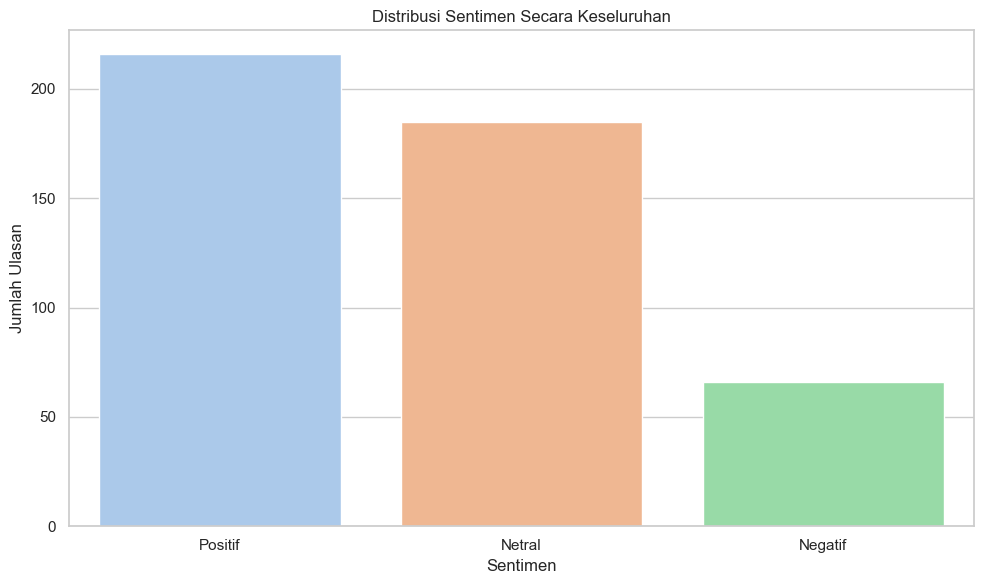

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Sentimen", palette="pastel")
plt.title("Distribusi Sentimen Secara Keseluruhan")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.tight_layout()
plt.show()


visualisasi Jumlah Ulasan per Aspek

C:\Users\afiii\AppData\Local\Temp\ipykernel_5680\2990360399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Aspek", palette="muted")


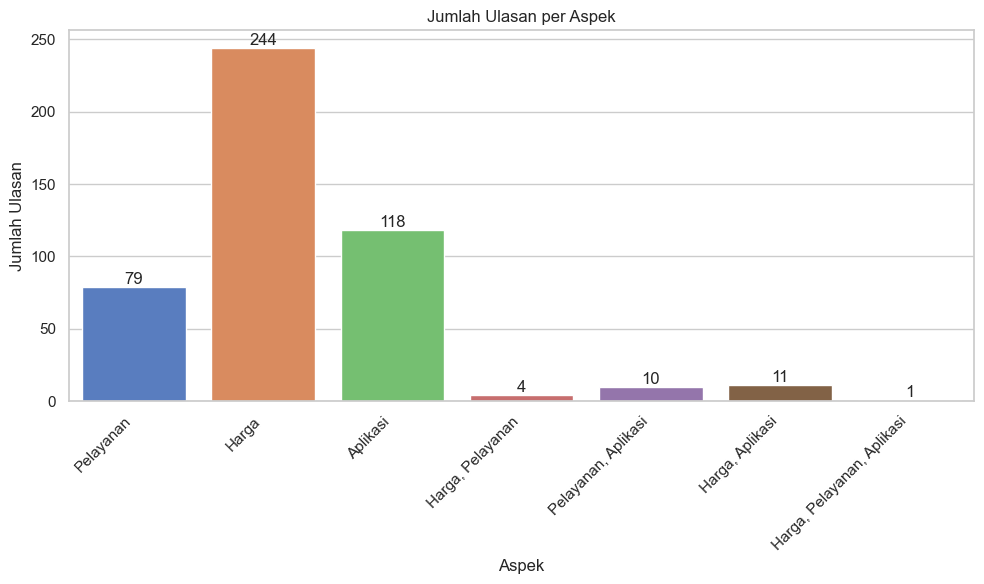

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Aspek", palette="muted")
plt.title("Jumlah Ulasan per Aspek")
plt.xlabel("Aspek")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=45, ha='right')

# Tambahin label angka tanpa decimal
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



Visualisasi Distribusi Sentimen per Aspek

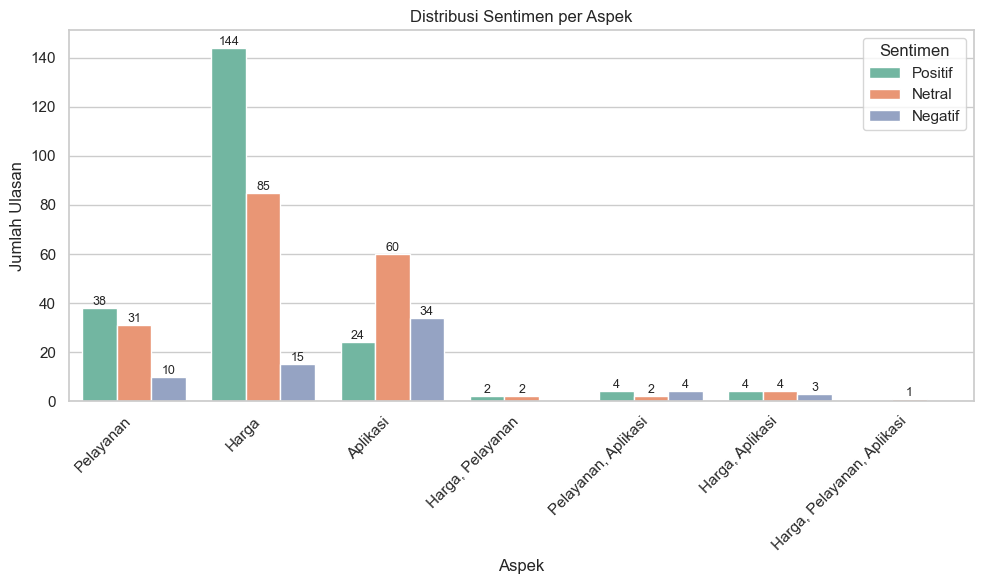

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Aspek", hue="Sentimen", palette="Set2")
plt.title("Distribusi Sentimen per Aspek")
plt.xlabel("Aspek")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentimen")

# Tambahin label angka tanpa decimal
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
!pip install catboost seaborn matplotlib scikit-learn pandas openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


# **MODELING & EVALUASI**

TF-IDF Vectorization + Split Data

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_excel("Dataset/ulasan_shopee_preprocessed.xlsx")
df.head()

# Ambil kolom teks dan label
X_raw = df['Ulasan_Clean']
y = df['Sentimen']

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_raw)

# Split data train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek shape hasil split
X_train.shape, X_test.shape


((373, 2098), (94, 2098))

Train Model GBC (Gradient Boosting Classifier)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training GBC
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Prediksi
y_pred_gbc = gbc.predict(X_test)

# Evaluasi
print("Evaluation Report: GBC")
print(classification_report(y_test, y_pred_gbc))
acc_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"\n Akurasi GBC: {acc_gbc:.2f}")


Evaluation Report: GBC
              precision    recall  f1-score   support

     Negatif       0.60      0.75      0.67         8
      Netral       0.73      0.88      0.80        42
     Positif       0.97      0.73      0.83        44

    accuracy                           0.80        94
   macro avg       0.77      0.79      0.76        94
weighted avg       0.83      0.80      0.80        94


 Akurasi GBC: 0.80


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


Train Model CatBoost

In [23]:
from catboost import CatBoostClassifier

# Training CatBoost
catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train, y_train)

# Prediksi
y_pred_cat = catboost.predict(X_test)

# Evaluasi
print("Evaluation Report: CatBoost")
print(classification_report(y_test, y_pred_cat))
acc_cat = accuracy_score(y_test, y_pred_cat)
print(f"\n Akurasi CatBoost: {acc_cat:.2f}")


Evaluation Report: CatBoost
              precision    recall  f1-score   support

     Negatif       0.86      0.75      0.80         8
      Netral       0.75      0.95      0.84        42
     Positif       0.97      0.75      0.85        44

    accuracy                           0.84        94
   macro avg       0.86      0.82      0.83        94
weighted avg       0.86      0.84      0.84        94


 Akurasi CatBoost: 0.84


In [24]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

y_pred_ensemble = []

for gbc_pred, cat_pred in zip(y_pred_gbc, y_pred_cat):
    if gbc_pred == cat_pred:
        y_pred_ensemble.append(gbc_pred)
    else:
        y_pred_ensemble.append(gbc_pred)

# Ubah ke array
y_pred_ensemble = np.array(y_pred_ensemble)

# Evaluasi hasil gabungan
print("Evaluation Report: Ensemble (GBC + CatBoost)")
print(classification_report(y_test, y_pred_ensemble))
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"\n Akurasi Ensemble: {acc_ensemble:.2f}")


Evaluation Report: Ensemble (GBC + CatBoost)
              precision    recall  f1-score   support

     Negatif       0.60      0.75      0.67         8
      Netral       0.73      0.88      0.80        42
     Positif       0.97      0.73      0.83        44

    accuracy                           0.80        94
   macro avg       0.77      0.79      0.76        94
weighted avg       0.83      0.80      0.80        94


 Akurasi Ensemble: 0.80


Visualisasi Confusion Matrix

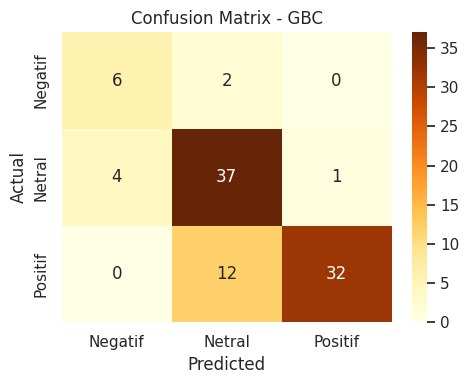

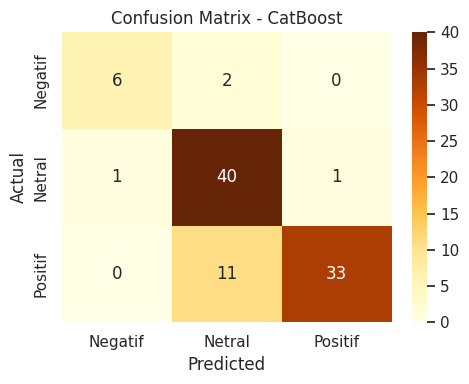

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi visualisasi Confusion Matrix
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
                xticklabels=['Negatif', 'Netral', 'Positif'],
                yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Confusion Matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_cat = confusion_matrix(y_test, y_pred_cat)

plot_conf_matrix(cm_gbc, "GBC")
plot_conf_matrix(cm_cat, "CatBoost")


Visualisasi F1-Score per Kelas

<ipython-input-44-b2ac83c477ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')


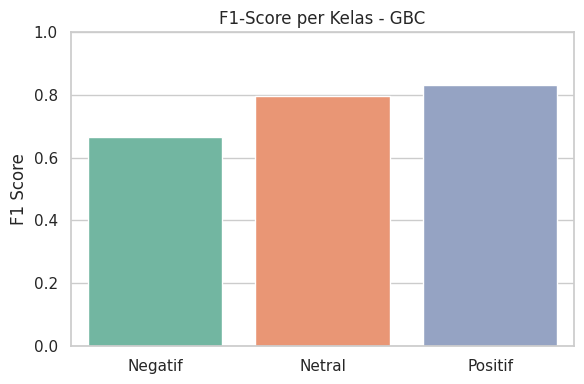

<ipython-input-44-b2ac83c477ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')


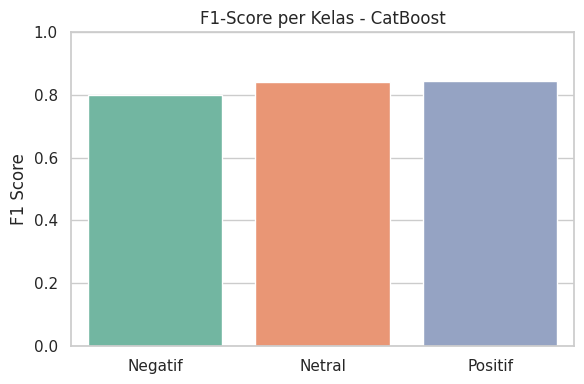

In [ ]:
from sklearn.metrics import classification_report

def plot_f1_scores(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    f1_scores = {
        label: report[label]['f1-score']
        for label in ['Negatif', 'Netral', 'Positif']
    }

    plt.figure(figsize=(6,4))
    sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')
    plt.title(f'F1-Score per Kelas - {model_name}')
    plt.ylim(0, 1)
    plt.ylabel('F1 Score')
    plt.tight_layout()
    plt.show()

plot_f1_scores(y_test, y_pred_gbc, "GBC")
plot_f1_scores(y_test, y_pred_cat, "CatBoost")


Perbandingan Akurasi GBC vs CatBoost

<ipython-input-45-286dba1e9265>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='coolwarm')


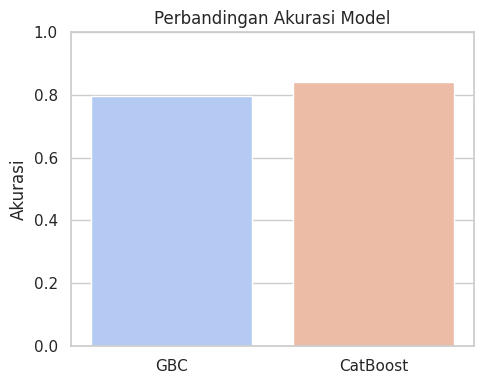

In [ ]:
# Grafik akurasi
plt.figure(figsize=(5,4))
models = ['GBC', 'CatBoost']
scores = [acc_gbc, acc_cat]
sns.barplot(x=models, y=scores, palette='coolwarm')
plt.ylim(0,1)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.tight_layout()
plt.show()
